In [1]:
import wandb
import pickle
import os
import numpy as np
from collections import defaultdict

raw_scores = None

In [ ]:
project_name = f"bert-base_multi_nli_analysis"
run_names = [f"bert-base_multi_nli_run0" for i in range(1)]
project_path = f"hugomilosz-imperial-college-london/bert-base_multi_nli_analysis/eval_summary_run0:v3"

# method_binaries = defaultdict(list)

api_run = wandb.init(project=project_name, job_type="aggregate_eval_summary")

for run_name in run_names:
    run_id = run_name.split("_")[-1]
    artifact_path = "hugomilosz-imperial-college-london/bert-base_multi_nli_analysis/eval_summary_run0:v3"
    artifact = api_run.use_artifact(artifact_path, type='pickle')
    artifact_dir = artifact.download()
    file_path = os.path.join(artifact_dir, "eval_summary_run0.pkl")
    print(f"Size of file: {os.path.getsize(file_path)} bytes")
    
    import glob
    for file in glob.glob(os.path.join(artifact_dir, "**/*.pkl"), recursive=True):
        print("Found pickle file:", file)

    with open(os.path.join(artifact_dir, "eval_summary_run0.pkl"), "rb") as f:
        eval_summary = pickle.load(f)

    raw_scores = eval_summary["raw_scores"]

wandb: Downloading large artifact eval_summary_run0:v3, 110.36MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.5


Size of file: 115725348 bytes
Found pickle file: /vol/bitbucket/hrm20/fyp/artifacts/eval_summary_run0:v3/eval_summary_run0.pkl


In [2]:
import generate_plots
import example_groups
from datasets import load_dataset

/vol/bitbucket/hrm20/fypenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
raw_scores['loss']['all_losses']
raw_scores['true_labels']
raw_scores['predictions']

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [3]:
import wandb
run = wandb.init()
artifact = run.use_artifact('hugomilosz-imperial-college-london/bert-base_multi_nli_analysis/eval_summary_run0:v6', type='pickle')
artifact_dir = artifact.download()

wandb: Currently logged in as: hugomilosz (hugomilosz-imperial-college-london) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


wandb: Downloading large artifact eval_summary_run0:v6, 80.40MB. 1 files... 
wandb:   1 of 1 files downloaded.  
Done. 0:0:0.4


In [4]:
# pickle_file_path = os.path.join(artifact_dir, 'eval_summary_run0.pkl')
# with open(pickle_file_path, 'rb') as f:
#     eval_summary = pickle.load(f)

file_path = '/vol/bitbucket/hrm20/fyp/artifacts/eval_summary_run0:v6/eval_summary_run0.pkl'

# Try opening the file directly

with open(os.path.join(artifact_dir, "eval_summary_run0.pkl"), "rb") as f:
    eval_summary = pickle.load(f)

raw_scores = eval_summary["raw_scores"]

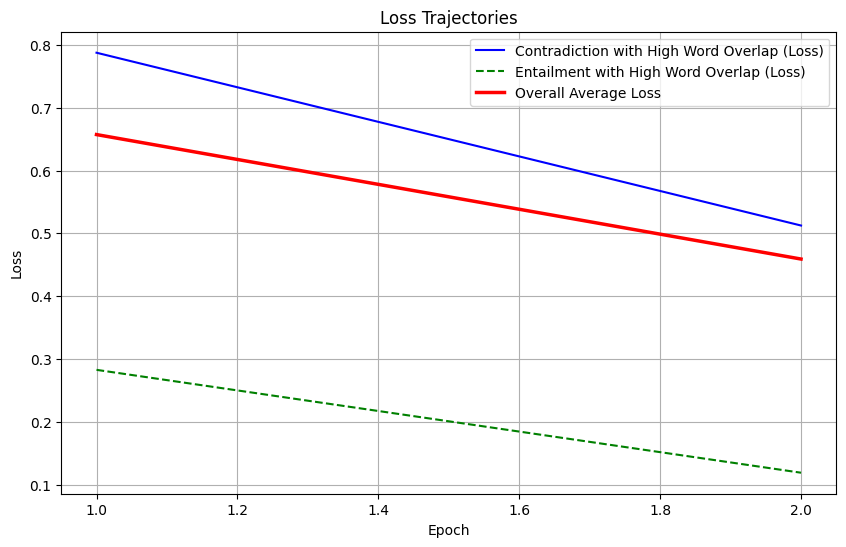

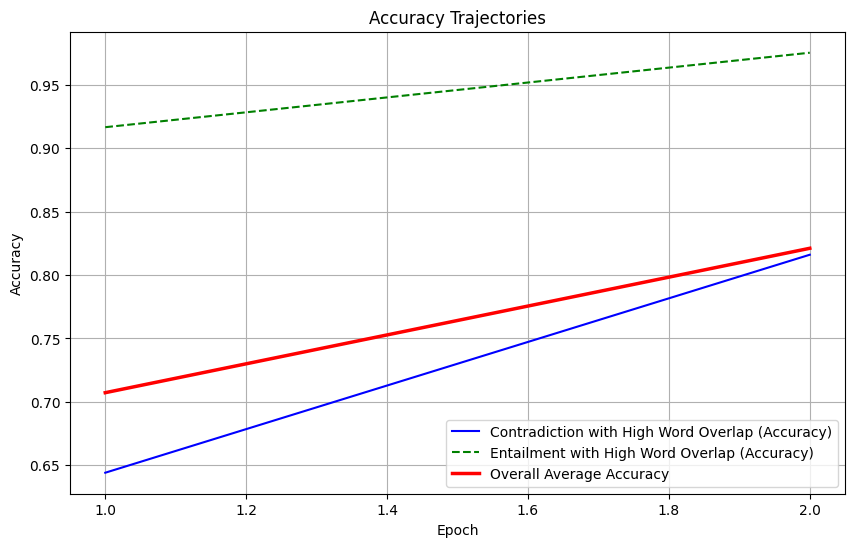

In [5]:
mnli = load_dataset('multi_nli')
fig1, fig2 = generate_plots.plot_losses_and_accuracies(mnli, raw_scores['loss']['all_losses'], raw_scores['true_labels'], raw_scores['predictions'])
fig1.show()
fig2.show()

In [5]:
# forgetting_results = trainer.get_unified_stats()['forgetting_stats']['forgetting_events']
all_losses = raw_scores['loss']['all_losses']
data_map_stats = raw_scores["datamap"]
aum_scores = raw_scores["aum"]
sample_margins = raw_scores["aum"]['sample_margins']

grand_scores = raw_scores['grand']
el2n_scores = raw_scores['el2n']


predictions = raw_scores['predictions']
true_labels = raw_scores['true_labels']

# total_samples = len(dataset_bundle.train_dataset)

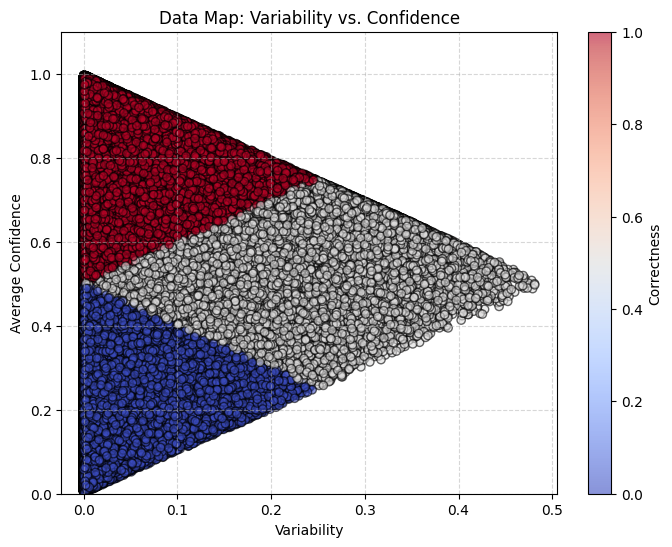

In [ ]:
# fig1, fig2 = generate_plots.plot_data_map(data_map_stats)
# fig1.show()
# fig2.show()
# fig1.savefig("data_map.png")
# fig2.savefig("data_map_variables.png")
import matplotlib.pyplot as plt

def plot_data_map(data_map_stats):
    confidence = np.array(data_map_stats["confidence"][:500])
    variability = np.array(data_map_stats["variability"][:500])
    correctness = np.array(data_map_stats["correctness"][:500])

    # --- First Figure: Scatter Plot ---
    fig1, ax1 = plt.subplots(figsize=(8, 6))
    scatter = ax1.scatter(variability, confidence, c=correctness, cmap="coolwarm", alpha=0.6, edgecolors="k")
    ax1.set_xlabel("Variability")
    ax1.set_ylabel("Average Confidence")
    ax1.set_ylim(0, 1.1)
    ax1.set_title("Data Map: Variability vs. Confidence")
    fig1.colorbar(scatter, ax=ax1, label="Correctness")
    ax1.grid(True, linestyle="--", alpha=0.5)
    return fig1
    
fig = plot_data_map(data_map_stats)
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot EL2N scores
for idx, (group, indices) in enumerate(results.items()):
    if not indices:
        continue

    # EL2N Scores
    group_el2n = el2n_scores[:, indices]
    avg_el2n_per_epoch = np.nanmean(group_el2n, axis=1)

    ax.plot(range(1, len(avg_el2n_per_epoch) + 1),
            avg_el2n_per_epoch,
            label=f"{group} (EL2N)",
            linestyle='--',  # Dashed lines for EL2N
            alpha=0.8)

# Overall EL2N Average
overall_avg_el2n = np.nanmean(el2n_scores, axis=1)
ax.plot(range(1, len(overall_avg_el2n) + 1),
        overall_avg_el2n,
        label='Overall Average EL2N',
        linestyle='--',
        linewidth=2.5,
        color='blue')

# Plot GraNd scores
for idx, (group, indices) in enumerate(results.items()):
    if not indices:
        continue

    # GraNd Scores
    group_grand = grand_scores[:, indices]
    avg_grand_per_epoch = np.nanmean(group_grand, axis=1)

    ax.plot(range(1, len(avg_grand_per_epoch) + 1),
            avg_grand_per_epoch,
            label=f"{group} (GraNd)",
            linestyle='-',  # Solid lines for GraNd
            alpha=0.8)

# Overall GraNd Average
overall_avg_grand = np.nanmean(grand_scores, axis=1)
ax.plot(range(1, len(overall_avg_grand) + 1),
        overall_avg_grand,
        label='Overall Average GraNd',
        linestyle='-',
        linewidth=2.5,
        color='red')

# Graph Titles and Labels
ax.set_title("Normalised EL2N and GraNd Trajectories")
ax.set_xlabel("Epoch")
ax.set_ylabel(" NormalisedScore")
ax.legend()
ax.grid(True)

plt.show()

In [3]:
import pandas as pd
import numpy as np

methods = list(votes.keys())
overlap_matrix = np.zeros((len(methods), len(methods)))

for i, method_i in enumerate(methods):
    for j, method_j in enumerate(methods):
        easy_i = votes[method_i] == 1
        easy_j = votes[method_j] == 1
        intersection = np.sum(np.logical_and(easy_i, easy_j))
        union = np.sum(np.logical_or(easy_i, easy_j))
        overlap_matrix[i, j] = intersection / union if union > 0 else 0.0

overlap_df = pd.DataFrame(overlap_matrix, index=methods, columns=methods)
print(overlap_df)

                     aum   datamap      el2n     grand      loss  forgetting  \
aum             1.000000  0.151295  0.039604  0.028169  0.039604    0.192698   
datamap         0.151295  1.000000  0.015102  0.024811  0.015102    0.908909   
el2n            0.039604  0.015102  1.000000  0.195122  1.000000    0.020284   
grand           0.028169  0.024811  0.195122  1.000000  0.195122    0.029412   
loss            0.039604  0.015102  1.000000  0.195122  1.000000    0.020284   
forgetting      0.192698  0.908909  0.020284  0.029412  0.020284    1.000000   
regularisation  0.205882  0.502045  0.021583  0.032200  0.021583    0.546371   

                regularisation  
aum                   0.205882  
datamap               0.502045  
el2n                  0.021583  
grand                 0.032200  
loss                  0.021583  
forgetting            0.546371  
regularisation        1.000000  
